**NYC Taxi Fare Prediction**

Source: https://www.kaggle.com/competitions/new-york-city-taxi-fare-prediction

Objective: 
Predicting fare amount (inclusive of tolls) for a taxi ride in New York City given the pickup and dropoff locations. 

I found this test set interesting because in this online transportation era, it is really helpful for the passenger to estimate their taxi ride cost so that it can be compared to other public transportations' cost.


The sample set contains below file:
- train.csv -> input features and target fare_amount values for the training set (about 55M rows)
- test.csv -> input features for the test set (about 10K rows). 

**Data fields:**

ID:
- key (unique string)

Features:
- pickup_datetime : timestamp value indication when the taxi ride started
- pickup_longitude : float for longitude coordinate of where the taxi ride started
- pickup_latitude : float for latitude coordinate of where the taxi ride started
- dropoff_longitude : float for longitude coordinate of where the taxi ride ended
- dropoff_latitude : float for latitude coordinate of where the taxi ride ended
- passenger_count : integer indicating the number of passengers in the taxi ride

Target:
- fare_amount : float dollar amount of the cost of the taxi ride

**Import Relevant Libraries**

In [4]:
import numpy as np 
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

**Load dataset**

In [5]:
test = pd.read_csv("./dataset/nyc-taxi-fare/test.csv")
train = pd.read_csv("./dataset/nyc-taxi-fare/train.csv", nrows = 1000000)

print('Load data into dataframe! :)')

Load data into dataframe! :)


**Data Pre-processing**

In [6]:
train.tail()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
999995,2014-09-13 21:44:38.0000001,7.0,2014-09-13 21:44:38 UTC,-73.976676,40.785630,-73.959196,40.775114,1
999996,2010-09-20 14:50:37.0000002,7.3,2010-09-20 14:50:37 UTC,-73.992103,40.671385,-73.992103,40.671385,2
999997,2013-04-26 14:03:00.000000118,10.5,2013-04-26 14:03:00 UTC,-73.978423,40.751135,-73.993397,40.762197,5
999998,2011-07-08 00:29:00.00000099,6.9,2011-07-08 00:29:00 UTC,-73.980317,40.759482,-73.976832,40.743122,1
999999,2009-12-31 14:30:00.00000021,4.1,2009-12-31 14:30:00 UTC,-74.006635,40.741598,-73.999450,40.745702,1


In [7]:
train.isnull().sum()

key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    10
dropoff_latitude     10
passenger_count       0
dtype: int64

In [8]:
train = train.dropna(how = 'any', axis = 'rows')

In [9]:
train.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [10]:
# analyzing outlier value #

train['fare_amount'].describe()

count    999990.000000
mean         11.347953
std           9.821790
min         -44.900000
25%           6.000000
50%           8.500000
75%          12.500000
max         500.000000
Name: fare_amount, dtype: float64

In [11]:
# there is negative value for the fare_amount. 
# in real life, the fare amount should always be positive.
# so, we have to drop all the value that is below zero

train = train.drop(train[train['fare_amount'] < 0].index, axis =0)

In [12]:
train['fare_amount'].describe()

count    999952.000000
mean         11.348616
std           9.821249
min           0.000000
25%           6.000000
50%           8.500000
75%          12.500000
max         500.000000
Name: fare_amount, dtype: float64

In [13]:
train['dropoff_latitude'].describe()

count    999952.000000
mean         39.920086
std           8.201183
min       -3114.338567
25%          40.734047
50%          40.753166
75%          40.768129
max        1651.553433
Name: dropoff_latitude, dtype: float64

In [14]:
train['dropoff_longitude'].describe()

count    999952.000000
mean        -72.528101
std          11.323777
min       -3383.296608
25%         -73.991385
50%         -73.980135
75%         -73.963654
max          45.581619
Name: dropoff_longitude, dtype: float64

In [15]:
train['pickup_latitude'].describe()

count    999952.000000
mean         39.929050
std           7.626126
min       -3116.285383
25%          40.734965
50%          40.752695
75%          40.767154
max        2621.628430
Name: pickup_latitude, dtype: float64

In [16]:
train['pickup_longitude'].describe()

count    999952.000000
mean        -72.526719
std          12.057786
min       -3377.680935
25%         -73.992060
50%         -73.981792
75%         -73.967095
max        2522.271325
Name: pickup_longitude, dtype: float64

In [17]:
# using some common knowledges, 
# we know that latitudes and longitudes have some specific range.
# latitude range from 0 - 90 (positive and negative)
# longitude range from 0 - 180 (positive and negative)
# the value outside those range is invalid.

train = train.drop(train[train['dropoff_latitude'] < -90].index, axis =0)

train = train.drop(train[train['dropoff_latitude'] > 90].index, axis =0)

train = train.drop(train[train['dropoff_longitude'] < -180].index, axis =0)

train = train.drop(train[train['dropoff_longitude'] > 180].index, axis =0)

train = train.drop(train[train['pickup_latitude'] < -90].index, axis =0)

train = train.drop(train[train['pickup_latitude'] > 90].index, axis =0)

train = train.drop(train[train['pickup_longitude'] < -180].index, axis =0)

train = train.drop(train[train['pickup_longitude'] > 180].index, axis =0)

In [18]:
# to make it easier, 
# I will add new columns to see the latitude and longitude difference, 
# between pickup and dropoff location

train['diff_lat'] = (train['dropoff_latitude'] - train['pickup_latitude']).abs()
train['diff_long'] = (train['dropoff_longitude'] - train['pickup_longitude']).abs()

In [19]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,diff_lat,diff_long
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,0.009041,0.002701
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,0.070701,0.036780
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,0.010708,0.008504
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,0.024949,0.004437
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,0.015754,0.011440


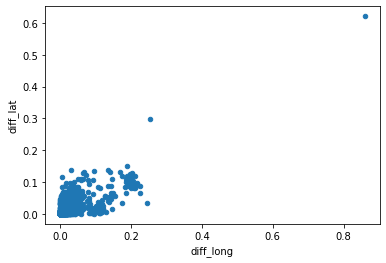

In [23]:
# 1 value different between any two latitude 
# or longitude accounted for 66 miles.
# Based on common knowledge, 
# New York City area comprises for less than 66 miles.
# Hence, the value of diff_lat or diff_long should be between 0-1
# Here is to visualize the data:

plot = train.iloc[:2000].plot.scatter('diff_long', 'diff_lat')

In [22]:
# Eliminating outliers

train = train[(train.diff_long < 5.0) & (train.diff_lat < 5.0)]

In [24]:
train['diff_lat'].describe()

count    997990.000000
mean          0.021086
std           0.027717
min           0.000000
25%           0.006580
50%           0.013832
75%           0.026808
max           3.820613
Name: diff_lat, dtype: float64

In [27]:
# analysing passenger_count attribute

train['passenger_count'].describe()

count    997989.000000
mean          1.684743
std           1.307613
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           6.000000
Name: passenger_count, dtype: float64

In [26]:
# the highest number of passenger is 208, which is not possible

train = train.drop(train[train['passenger_count']==208].index, axis = 0)

**Model Training**

In [28]:
# function to convert dataframe to matrix #

def get_input_matrix(df):
    return np.column_stack((df.diff_long, df.diff_lat, np.ones(len(df))))

train_X = get_input_matrix(train)
train_y = np.array(train['fare_amount'])

print(train_X)
print(train_y)


[[0.002701 0.009041 1.      ]
 [0.03678  0.070701 1.      ]
 [0.008504 0.010708 1.      ]
 ...
 [0.014974 0.011062 1.      ]
 [0.003485 0.01636  1.      ]
 [0.007185 0.004104 1.      ]]
[ 4.5 16.9  5.7 ... 10.5  6.9  4.1]


**Linear Regression**

In [54]:
(w, _, _, _) = np.linalg.lstsq(train_X, train_y, rcond=None)

print(w)

[146.13755811  89.2492332    6.17095316]


**Random Forest Regression**

In [55]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(train_X, train_y, test_size=0.2)

print('x train: ',len(x_train))
print('x test: ',len(x_cv))
print('y train: ',len(y_train))
print('y test: ',len(y_cv))

x train:  798391
x test:  199598
y train:  798391
y test:  199598


In [56]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(x_train,y_train)


RandomForestRegressor()

**Testing Phase and Evaluation**

In [58]:
# add column to test dataframe 

test['diff_lat'] = (test['dropoff_latitude'] - test['pickup_latitude']).abs()
test['diff_long'] = (test['dropoff_longitude'] - test['pickup_longitude']).abs()


In [59]:
test.tail()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,diff_lat,diff_long
9909,2015-05-10 12:37:51.0000002,2015-05-10 12:37:51 UTC,-73.968124,40.796997,-73.955643,40.780388,6,0.016609,0.012482
9910,2015-01-12 17:05:51.0000001,2015-01-12 17:05:51 UTC,-73.945511,40.803600,-73.960213,40.776371,6,0.027229,0.014702
9911,2015-04-19 20:44:15.0000001,2015-04-19 20:44:15 UTC,-73.991600,40.726608,-73.789742,40.647011,6,0.079597,0.201859
9912,2015-01-31 01:05:19.0000005,2015-01-31 01:05:19 UTC,-73.985573,40.735432,-73.939178,40.801731,6,0.066299,0.046394
9913,2015-01-18 14:06:23.0000006,2015-01-18 14:06:23 UTC,-73.988022,40.754070,-74.000282,40.759220,6,0.005150,0.012260


In [60]:
# evaluate
test_X = get_input_matrix(test)
test_y = np.matmul(test_X,w).round(decimals = 2)


In [61]:
pred_cv = rf.predict(test_X)

**Results**

In [66]:
submission = pd.DataFrame()
submission["key"] = test.key
submission["diff_lat"] = test.diff_lat
submission["diff_long"] = test.diff_long
submission["fare_amount"] = test_y
submission.to_csv('submission.csv', index = False)

In [65]:
predictions = pd.DataFrame()
predictions["key"] = test.key
predictions["diff_lat"] = test.diff_lat
predictions["diff_long"] = test.diff_long
predictions["fare_amount"] = pred_cv
predictions.to_csv('rf_predictions.csv', index = False)

**Summary**

From the provided information (latitude and longitude of pickup and dropoff) we can estimate the taxi fare. As the different of the pickup and dropoff point increases, the taxi fare increase as well.